In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

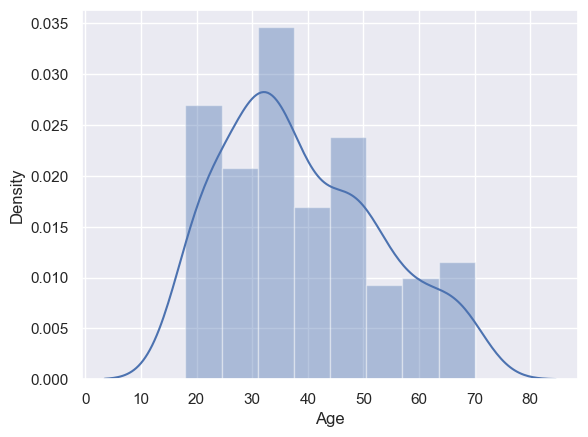

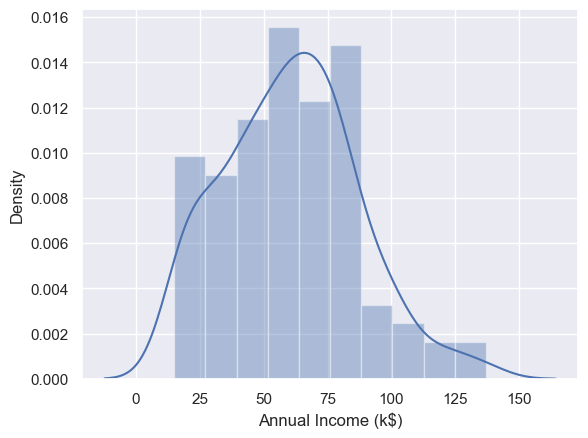

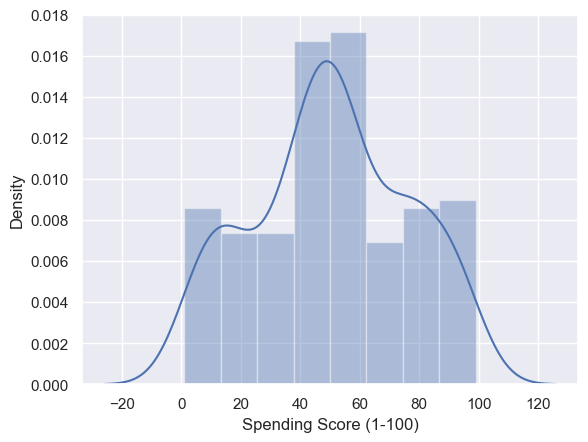

In [6]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

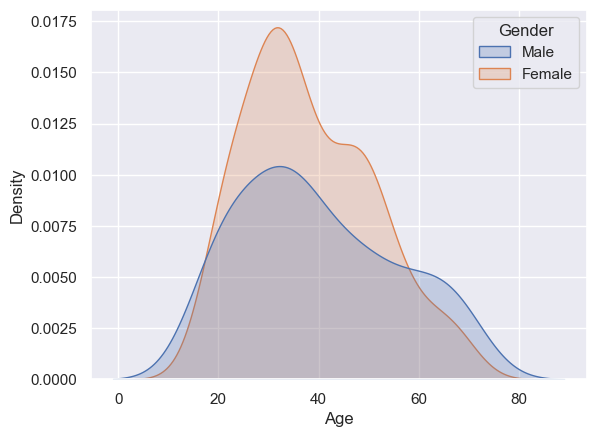

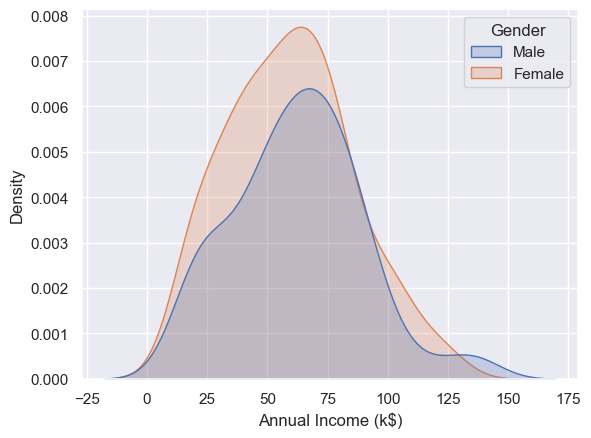

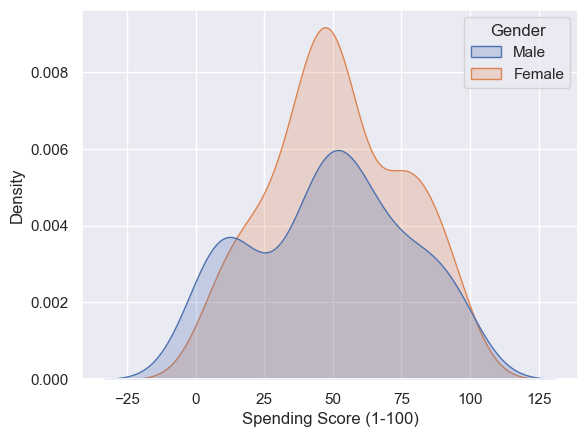

In [7]:
# all normal distributions

for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i], shade = True, hue= df['Gender'])


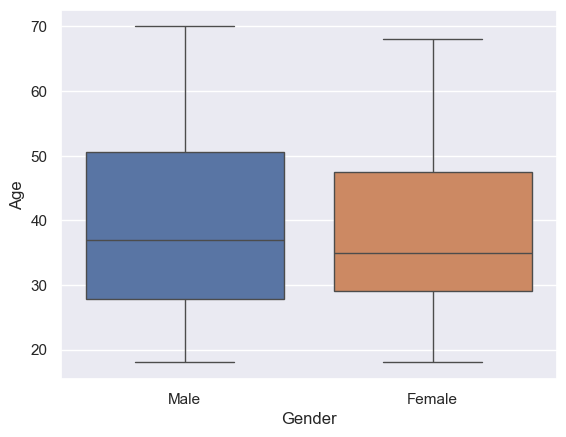

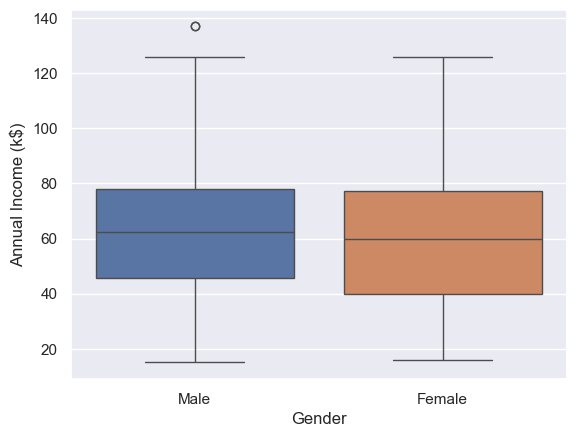

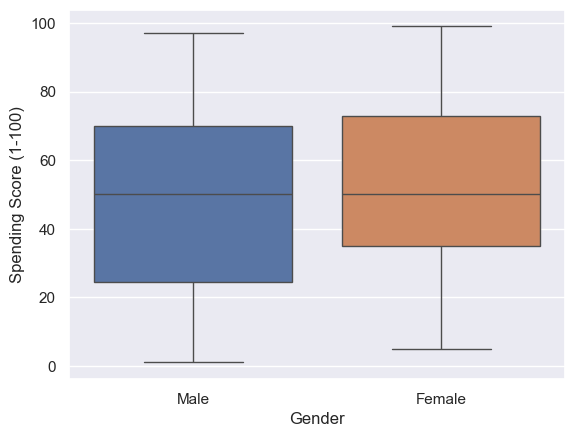

In [8]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=i, hue='Gender')

In [9]:
df['Gender'].value_counts(normalize=True)


Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

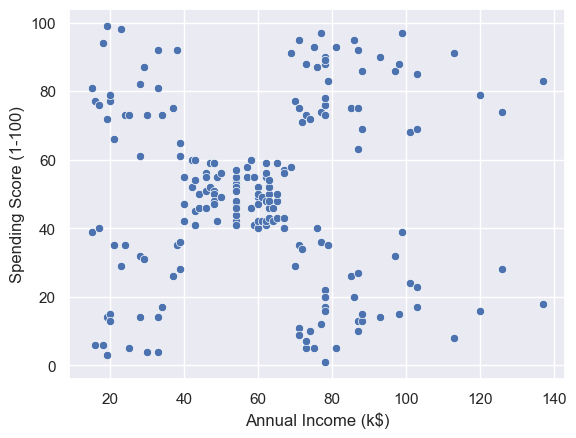

In [10]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

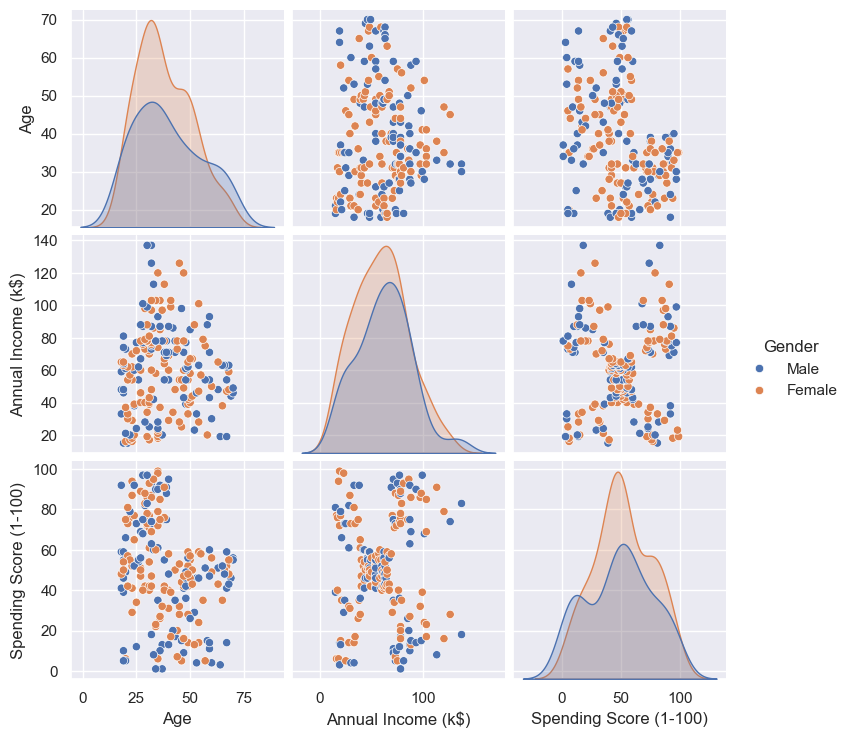

In [11]:
df2=df.drop('CustomerID',axis=1)
sns.pairplot(df2, hue='Gender')
# customer id doesnt give any information

In [12]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


<Axes: >

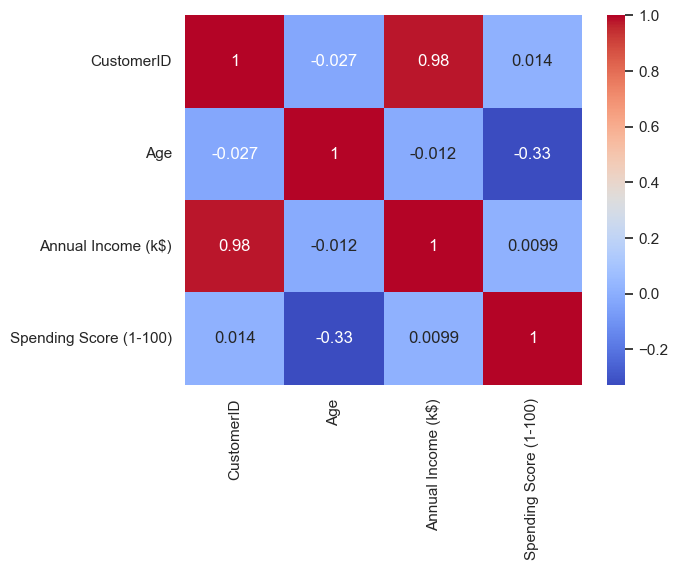

In [13]:
df3=df.drop('Gender',axis=1)
print(df3.corr())
sns.heatmap(df3.corr(), annot=True, cmap= 'coolwarm')

# Clustering- uni, bi, multi

Text(0, 0.5, 'Within-cluster Sum of Squares')

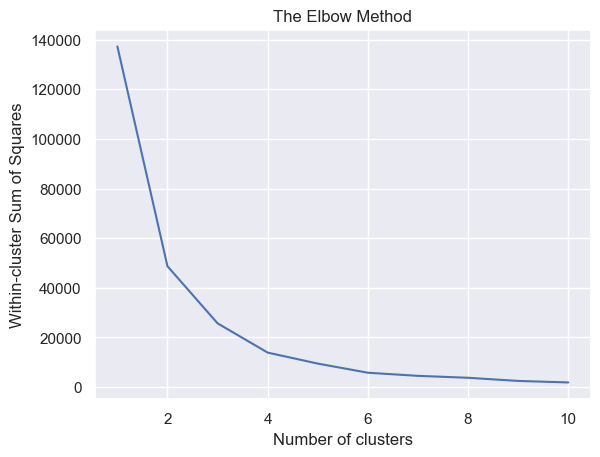

In [14]:
wcss=[]

for i in range (1,11):
    kmeans=KMeans(i)
    kmeans.fit(df[['Annual Income (k$)']])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [15]:
# we take 4

kmeans=KMeans(4)
kmeans.fit(df[['Annual Income (k$)']])
df['income cluster']= kmeans.labels_
df['income cluster'].value_counts()


income cluster
2    68
0    62
1    50
3    20
Name: count, dtype: int64

In [16]:
df.groupby('income cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,36.838710,77.806452,50.403226
1,35.280000,27.400000,49.480000
2,43.970588,54.764706,50.014706
3,36.600000,109.700000,52.000000


Text(0, 0.5, 'Within-cluster Sum of Squares')

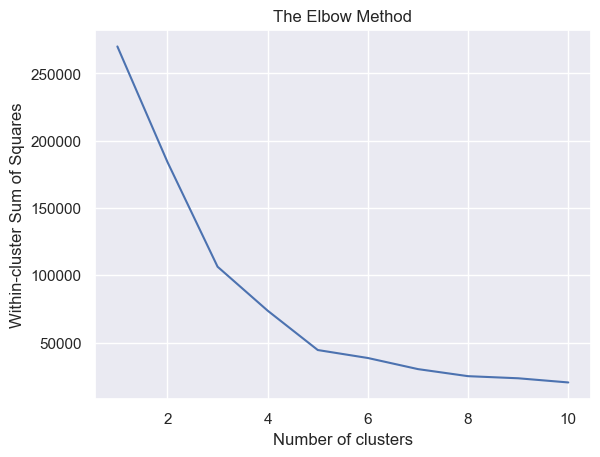

In [17]:
wcss2=[]

for i in range (1,11):
    kmeans2=KMeans(i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    wcss2.append(kmeans2.inertia_)
    
plt.plot(range(1,11), wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [18]:
# we take 5
kmeans2=KMeans(5)
kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster']=kmeans2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


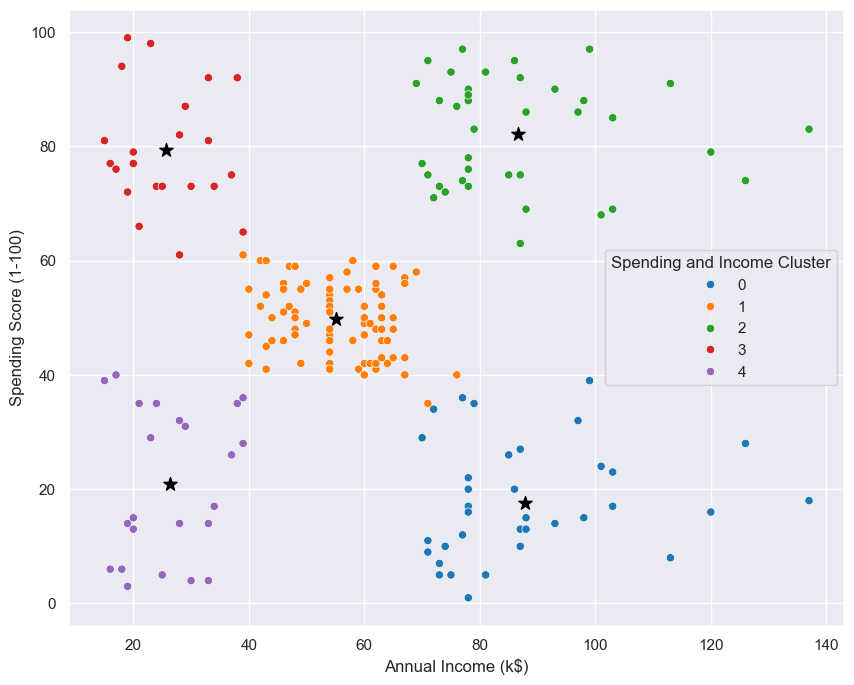

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

# adding cluster centres
centers = pd.DataFrame(kmeans2.cluster_centers_)

plt.scatter(x=centers[0],y=centers[1],s=100, marker='*',c='black')
plt.savefig("kmeans.png")

In [20]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.472222,0.527778
1,0.587500,0.412500
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [21]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,40.666667,87.750000,17.583333
1,42.937500,55.087500,49.712500
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [22]:

#mulivariate clustering 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [23]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,True
1,2,21,15,81,1,3,True
2,3,20,16,6,1,4,False
3,4,23,16,77,1,3,False
4,5,31,17,40,1,4,False


In [24]:
dff.columns


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [25]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [26]:
dff = scaler.fit_transform(dff)


In [27]:
dff = pd.DataFrame(scaler.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


Text(0, 0.5, 'Within-cluster Sum of Squares')

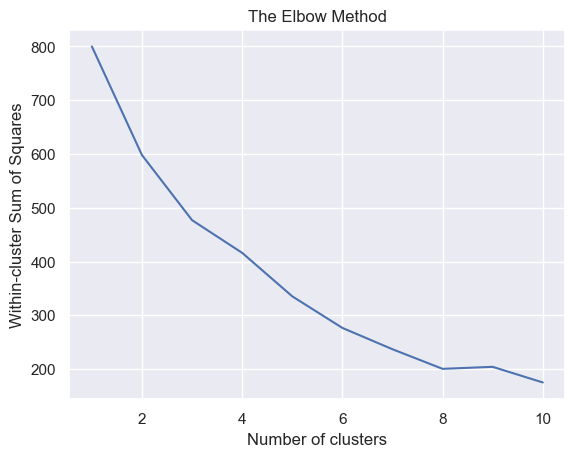

In [28]:
wcss3=[]

for i in range (1,11):
    kmeans3=KMeans(i)
    kmeans3.fit(dff)
    wcss3.append(kmeans3.inertia_)
    
plt.plot(range(1,11), wcss3)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [29]:
# we take 6
# but even without gender it's self sufficient
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4
